<a href="https://colab.research.google.com/github/pranjalchaubey/Credit-Fraud-Detection/blob/master/src/Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
The dataset has been sourced from Kaggle competition _IEEE-CIS Fraud Detection_.  
You can find more information about it [here](https://www.kaggle.com/c/ieee-fraud-detection/overview). 

## Setup the Colab Environment
Install and import all the required libraries.  
Colab environment should have them already, but just in case! 

In [1]:
# Bare basics
!pip install numpy pandas matplotlib seaborn scikit-learn pandas-profiling

In [2]:
# Feature engineering 
!pip install featuretools Boruta

     |████████████████████████████████| 61kB 7.1MB/s 


In [0]:
# Data Mining and plotting 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Feature selection
from boruta import BorutaPy as bp

In [0]:
# Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import collections

In [6]:
# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import os
import sys
import shutil
# if in Google Colaboratory
try:
    from google.colab import drive
except:
    pass

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Configure Pandas Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
# Since I am running this notebook on Colab, 
# Let's try and get some system information 
import platform
print('System Processor: ', platform.processor(), '\n')
!nvidia-smi

System Processor:  x86_64 

Thu Sep 19 08:36:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                

## Load the Dataset
Mount the gDrive and load the dataset from there.  
Loading dataset inside the Colab is taking forever! 

In [17]:
# Mount the Google Drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
filepath = '/content/drive/My Drive/siraj_week3/'

print('Loading the Dataset...')

print('Train Transaction')
df_train_transaction = pd.read_csv(filepath + 'train_transaction.csv')
display(df_train_transaction.shape)

print('Train Identity')
df_train_identity = pd.read_csv(filepath + 'train_identity.csv')
display(df_train_identity.shape)

print('Test Transaction')
df_test_transaction = pd.read_csv(filepath + 'test_transaction.csv')
display(df_test_transaction.shape)

print('Test Identity')
df_test_identity = pd.read_csv(filepath + 'test_identity.csv')
display(df_test_identity.shape)

print('DONE!')

Loading the Dataset...
Train Transaction


(590540, 394)

Train Identity


(144233, 41)

Test Transaction


(506691, 393)

Test Identity


(141907, 41)

DONE!


In [19]:
display(df_train_transaction.sample(5))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
353940,3340940,0,8731474,445.00,W,7664,490.0,150.0,visa,226.0,debit,264.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583136,3570136,0,15598520,42.95,W,12544,321.0,150.0,visa,226.0,debit,337.0,87.0,14.0,NaN,gmail.com,NaN,8.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,4.0,0.0,4.0,0.0,37.0,6.0,72.0,72.0,5.0,489.0,5.0,NaN,NaN,NaN,NaN,505.0,470.0,NaN,NaN,NaN,110.0,T,T,F,NaN,NaN,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0

In [20]:
display(df_test_transaction.sample(5))

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
486230,4149779,33705569,50.00,R,9421,555.0,150.0,visa,162.0,credit,204.0,87.0,NaN,NaN,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,124.083336,0.083333,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503375,4166924,34114041,970.95,W,2074,564.0,150.0,visa,226.0,credit,204.0,87.0,10.0,NaN,msn.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,F,F,NaN,NaN,T,F,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0

In [21]:
display(df_train_identity.sample(5))

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
107850,3391774,-5.0,294278.0,0.0,-5.0,0.0,-33.0,NaN,NaN,0.0,-5.0,100.0,NotFound,64.0,NaN,Found,Found,225.0,15.0,266.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 55.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J510MN Build/MMB29M
125386,3487887,-5.0,60728.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,427.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 65.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
144056,3576560,-10.0,41910.0,NaN,NaN,NaN,NaN,28.0,-100.0,NaN,NaN,100.0,NotFound,51.0,-300.0,New,NotFound,NaN,NaN,NaN,NaN,840.0,14.0,IP_PROXY:ANONYMOUS,11.0,205.0,146.0,Found,New,NotFound,Windows 7,chrome 55.0,24.0,1920x1080,match_status:2,T,T,T,T,desktop,Windows
121249,3463968,-5.0,120387.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,64.0,-480.0,Found,Found,166.0,NaN,454.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 60.0,24.0,1440x900,match_status:2,T,F,T,F,desktop,MacOS
97157,3340448,-5.0,261110.0,0.0,0.0,11.0,-1.0,NaN,NaN,0.0,0.0,100.0,NotFound,33.0,NaN,Found,Found,166.0,15.0,308.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,mobile safari generic,NaN,NaN,NaN,F,F,T,F,mobile,NaN


Notice that in the above samples, the _'test...'_ datasets are missing the _isFraud'_ column.  
Therefore, we will only be using the _'Train'_ dataset for both testing and training our logistic regression.  

<br/>However, first we need to combine the _'train_transaction'_ and 'train_identity'_ datasets. 

In [22]:
df_dataset = df_train_transaction.merge(df_train_identity, how='outer', on='TransactionID')
print(df_train_transaction.shape)
print(df_dataset.shape)

(590540, 394)
(590540, 434)


In [23]:
df_dataset.sample(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
490733,3477733,0,12790842,1035.950,W,6019,583.0,150.0,visa,226.0,credit,315.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,F,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1035.949951,1035.949951,1035.949951,0.0,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,1035.949951,1035.949951,1035.949951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156695,3143695,0,3265195,55.968,C,18301,459.0,185

In [24]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [0]:
# Free the RAM 
df_train_transaction = None
df_train_identity = None
df_test_transaction = None
df_test_identity = None

## Exploratory Data Analysis 
Let's check out what we got in this dataset. 

In [26]:
# Explore each column 
for col, values in df_dataset.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    if values.dtype != str and values.dtype != object:
      print (values.max(), values.min())
    print ('\n')

TransactionID: 590540
3577539 2987000


isFraud: 2
1 0


TransactionDT: 573349
15811131 86400


TransactionAmt: 20902
31937.391 0.251


ProductCD: 5


card1: 13553
18396 1000


card2: 500
600.0 100.0


card3: 114
231.0 100.0


card4: 4


card5: 119
237.0 100.0


card6: 4


addr1: 332
540.0 100.0


addr2: 74
102.0 10.0


dist1: 2651
10286.0 0.0


dist2: 1751
11623.0 0.0


P_emaildomain: 59


R_emaildomain: 60


C1: 1657
4685.0 0.0


C2: 1216
5691.0 0.0


C3: 27
26.0 0.0


C4: 1260
2253.0 0.0


C5: 319
349.0 0.0


C6: 1328
2253.0 0.0


C7: 1103
2255.0 0.0


C8: 1253
3331.0 0.0


C9: 205
210.0 0.0


C10: 1231
3257.0 0.0


C11: 1476
3188.0 0.0


C12: 1199
3188.0 0.0


C13: 1597
2918.0 0.0


C14: 1108
1429.0 0.0


D1: 641
640.0 0.0


D2: 641
640.0 0.0


D3: 649
819.0 0.0


D4: 808
869.0 -122.0


D5: 688
819.0 0.0


D6: 829
873.0 -83.0


D7: 597
843.0 0.0


D8: 12353
1707.7916259765625 0.0


D9: 24
0.9583330154418944 0.0


D10: 818
876.0 0.0


D11: 676
670.0 -53.0


D12: 635
648.0 -83.0


D1

From the data above we can conclude that in all the numerical fields, the  
value doesn't really go below _-600_. Therefore, we can patch the _NAN_ fields with _**-999**_.  

<br/>We are also going to patch categorical _NAN_ data with -999.  


In [27]:
print('Total Number of NANs = ', df_dataset.isnull().sum().sum())

Total Number of NANs =  115523073


In [0]:
df_dataset.fillna(value=-999, inplace=True)

In [29]:
print('Total Number of NANs = ', df_dataset.isnull().sum().sum())

Total Number of NANs =  0


This dataset is supposed to be an imbalanced dataset.  
Let's check out just how much imbalanced it actually is. 

In [30]:
print(f'Total number of Transactions {df_dataset.shape[0]}')
print(f'Total Number of Fraudulent Transactions {df_dataset["isFraud"]\
                                                 .values.sum()}')
print(f'Just {(df_dataset["isFraud"].values.sum()/df_dataset.shape[0])\
              *100:0.3f}% of the transactions are Fraudulent')

Total number of Transactions 590540
Total Number of Fraudulent Transactions 20663
Just 3.499% of the transactions are Fraudulent


### Balancing the Dataset - Undersampling
Only 3.5% of the total transactions are fraudulent.  
The dataset is obviously imbalanced.  
Let's capture all the fraud transactions and then undersample the good  
transactions.  

<br/> _We have chosen undersampling since this dataset is huge and training  
the classifier on oversampled dataset will take a huge amount of time._ 

In [31]:
# Separate the target column, isFraud
y = df_dataset['isFraud']
# Drop the isFraud column from the dataset df
X = df_dataset.drop(labels='isFraud', axis=1)

print(y.shape, X.shape)
display(y.sample(5))
display(X.sample(5))

(590540,) (590540, 433)


282024    0
322860    0
423294    0
391098    0
585528    0
Name: isFraud, dtype: int64

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
447270,3434270,11390979,29.00,W,7919,194.0,150.0,mastercard,166.0,debit,315.0,87.0,7.0,-999.0,gmail.com,-999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.000000,-999.000000,0.0,0.0,-999.0,-999.0,-999.0,0.0,T,T,T,M0,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0

In [0]:
# Clear RAM 
df_dataset = None 

In [33]:
# Now that we have separated the target variable
# Time to undersample 
rus = RandomUnderSampler(random_state=786)
X_rus, y_rus = rus.fit_resample(X, y)

# Check
print(X_rus.shape, y_rus.shape)

(41326, 433) (41326,)


In [36]:
# Check Dataset Balance 
print(f'Total number of Transactions {X_rus.shape[0]}')
print(f'Total Number of Fraudulent Transactions {y_rus.sum()}')
print(f'Exactly {(y_rus.sum()/X_rus.shape[0])\
              *100:0.3f}% of the transactions are Fraudulent')

Total number of Transactions 41326
Total Number of Fraudulent Transactions 20663
Exactly 50.000% of the transactions are Fraudulent


### Correlations 
Let's check out correlations among various numeric fields. 

In [37]:
# Extract numerical columns 
num_col_list = X.select_dtypes([np.number]).columns
display(num_col_list)

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32'], dtype='object', length=402)

In [38]:
# X_rus is a numpy array 
# Recreate the undersampled dataframe 

df_X_rus = pd.DataFrame(data=X_rus,    # values
              index=X_rus[:,0],    # 1st column as index
              columns=X.columns.values)  # 1st row as the column names

df_X_rus.shape

(41326, 433)

In [39]:
df_X_rus_boruta = df_X_rus.copy()
df_X_rus.sample(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
3567690,3567690,15481761,35.966,C,9026,545,185,visa,137,credit,-999,-999,-999,199,hotmail.com,hotmail.com,16,22,0,6,0,6,6,9,0,8,10,10,1,1,12,12,9,12,6,12,6,11.1667,0.166666,0,-999,12,11,12,12,-999,-999,-999,M2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,7,11,4,4,1,1,1,5,9,2,2,0,0,1,2,2,0,0,5,7,1,1,4,4,1,1,1,1,1,2,2,0,0,0,1,1,2,2,0,0,6,10,1,3,4,1,1,1,1,4,9,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,0,3,0,4,11,0,0,0,0,1,0,11,3,0,0,0,0,0,0,1,5,4,6,1,1,2,2,2,2,1,1,1,1,4,8,0,326.274,86.5023,0,0,0,0,0,0,0,326.274,86.5023,0,0,0,0,18,3,8,11,18,0,1,0,0,1,1,12,2,0,14,3,3,0,3,0,3,3,1,1,1,2,1,4,1,1,2,2,2,2,1,1,1,1,1,1,4,5,1,4,1,0,578.035,86.5023,0,35.9658,0,0,35.9658,35.9658,35.9658,0,434.172,86.5023,0,107.897,0,0,0,3,5,7,0,1,0,0,1,1,1,8,1,0,5,0,1,0,1,0,1,1,1,4,1,1,0,238.481,0,0,35.9658,0,0,35.9658,35.9658,35.9658,0,166.549,0,0,35.9658,0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-45,83480,0,0,3,-8,-999,-999,0,0,100,NotFound,27,-999,Found,Found,225,-999,271,507,-999,-999,-999,-999,-999,-999,-999,Found,Found,-999,chrome 63.0 for android,-999,-999,-999,F,F,T,F,mobile,CAM-L03 Build/HUAWEICAM-L03
3205410,3205410,5097712,20,S,3653,517,150,mastercard,224,debit,330,87,-999,174,-999,-999,2,16,0,4,0,0,0,17,0,112,8,0,194,2,636,636,-999,-999,-999,-999,-999,49,0,-999,-999,-999,49,630,649,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-

In [40]:
# Drop all columns from df_X_rus except for the numerical ones 
df_X_rus = df_X_rus[num_col_list]
# Convert all columns to numeric type (they are 'object' by default)
df_X_rus = df_X_rus.apply(pd.to_numeric) 
# Check
df_X_rus.shape

(41326, 402)

Now that our dataframe _df_X_rus_ only has numerical columns, let's plot the  
correlation graph. 

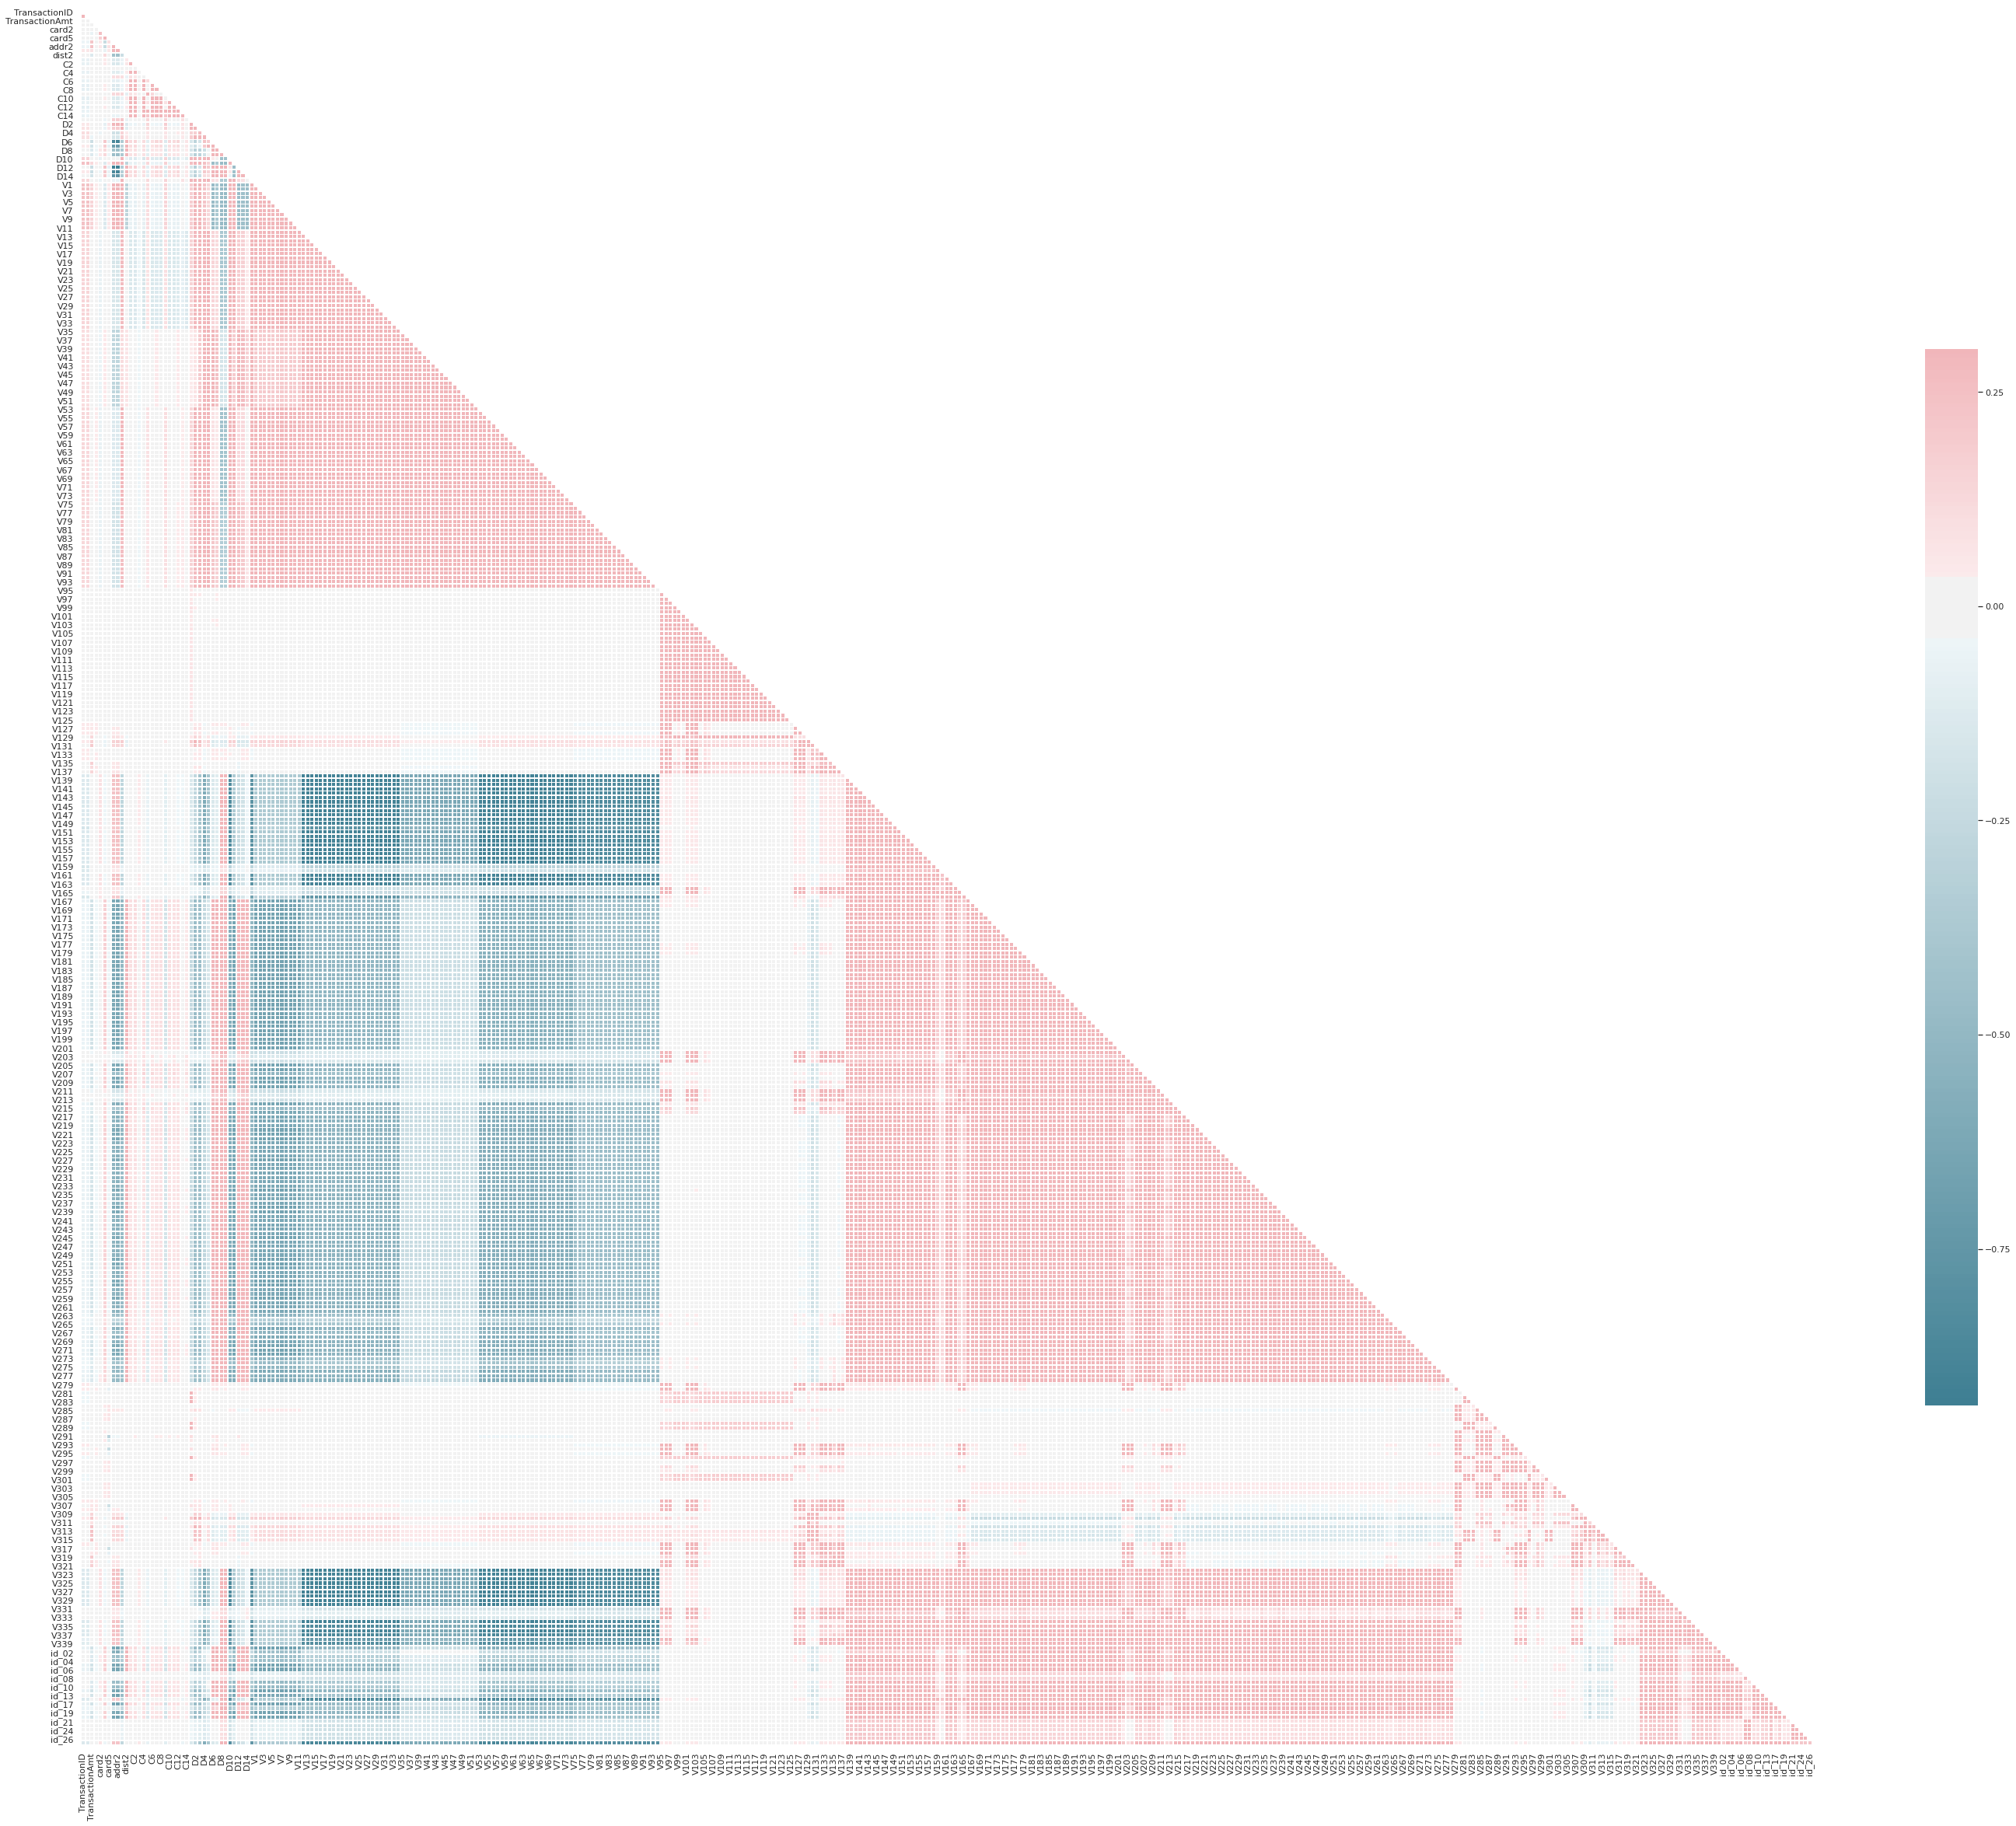

In [41]:
def sns_heatmap_diag(corr):
  """
  Plots diagonal correlation heatmap using Seaborn.  

  Parameters
  ----------
  corr : 2D numpy array    
      Correlation matrix from a pandas DF
      
  Returns
  -------
  None. Just plots the plot. 
  """
  # Set the plot style 
  sns.set(style="white")
  # Compute the correlation matrix
  # corr = df_X_rus.corr()
  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(50, 50))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  # Draw the heatmap with the mask and correct aspect ratio
  try:
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
  except ValueError:
    pass
  
  return None

sns_heatmap_diag(df_X_rus.corr())

The correlation heatmap above is terrible for the eyes. (You can download the  
full size image separately; find it inside the _'img'_ folder in the repository)  
<br/>However, it shows that a lot of _'features'_ in the dataset are negatively(over -0.50) correlated among themselves. 

## Feature Selection
Currently we have over 400 features.

<br/>Let's try _**Boruta Algorithm**_ and perform feature extraction.  
We will be using the algorithm to extract some meaningful features from the  
Dataset.   

In [0]:
# Boruta uses RandomnForestClassifier/LGBM/XGBOOST
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1,\
                             class_weight='balanced', max_depth=3)
boruta_selector = bp(rfc, n_estimators='auto', verbose=2)

In [43]:
# Start Feature Selection 
boruta_selector.fit(df_X_rus.values, y_rus)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	283
Tentative: 	119
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	283
Tentative: 	95
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	283
Tentative: 	95
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	283
Tentative: 	95
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	308
Tentative: 	70
Rejected: 	24
Iteration: 	13 / 100
Confirmed: 	308
Tentative: 	70
Rejected: 	24
Iteration: 	14 / 100
Confirmed: 	308
Tentative: 	61
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	308
Tentative: 	61
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=3,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=885, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x7f68e0164d80>,
                                          verbose=0, warm_start=False),
         max_iter=

In [47]:
print('==============BORUTA==============')
print(boruta_selector.n_features_)
print(boruta_selector.support_)

==============BORUTA==============
342
[ True  True  True  True  True  True  True  True  True False False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False

In [49]:
# Boruta says only 342 features are relevant 
# Extract the relevant features in a list 
selected_features = [num_col_list[i] for i, feature in \
                     enumerate(boruta_selector.support_) if feature]
print(len(selected_features))
print(selected_features)

342
['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',

In [50]:
# Irrelevant Features 
print(set(num_col_list) - set(selected_features))

{'V276', 'V250', 'V226', 'V260', 'V7', 'id_26', 'V25', 'V6', 'id_08', 'V77', 'V300', 'V278', 'V8', 'V112', 'id_25', 'C3', 'V115', 'dist2', 'V119', 'V120', 'V41', 'V121', 'V107', 'V26', 'id_03', 'V5', 'V109', 'V238', 'V3', 'V88', 'V114', 'V122', 'V108', 'V240', 'V14', 'V116', 'id_24', 'id_07', 'V239', 'V118', 'V110', 'V117', 'V89', 'V4', 'V241', 'V27', 'V111', 'id_18', 'V237', 'V305', 'V235', 'V28', 'V113', 'V1', 'V2', 'V227', 'id_22', 'dist1', 'id_21', 'V9'}


In [51]:
# Keep only the 'selected_features' in the Dataframe 
df_final_dataset = df_X_rus[selected_features]

df_final_dataset.shape

(41326, 342)